In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [79]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/NFLPlaybyPlay.csv")
df.head()

C:\Users\ttank\AppData\Local\Temp\ipykernel_35628\1328012104.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/NFLPlaybyPlay.csv")


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [21]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/NFLPlaybyPlay.csv")
df.head()

C:\Users\ttank\AppData\Local\Temp\ipykernel_35628\1328012104.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/NFLPlaybyPlay.csv")


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [22]:
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,362447.000000,361724.000000,336850.000000,362447.0,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,7919.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,338765.000000,338765.000000,340472.000000,338765.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362299.000000,362447.000000,362447.000000,362299.000000,362125.000000,141806.000000,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,25.907895,0.049422,0.291183,1.0,5.034595,0.072171,0.029166,0.000392,0.001368,0.412882,3.271648,1.253747,0.052355,0.011215,0.296452,0.248566,37.379341,0.014272,0.027094,0.008227,0.071969,0.608792,10.257134,11.474904,-1.191217,7.830319,0.041134,2.519651,2.540589,2.514224,2.520297,2.493382,0.127559,0.094798,0.002514,0.140266,0.243912,0.002635,0.296208,0.024350,0.000690,1.564915,0.020177,0.526933,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,24.859579,0.216747,0.454308,0.0,9.144627,0.258770,0.168271,0.019790,0.036968,0.492353,7.511632,4.199049,0.222743,0.105308,0.456693,0.432182,10.306545,0.118612,0.162356,0.090331,0.258437,2.607951,9.460576,9.946084,10.791503,7.477384,0.198601,0.778920,0.760446,0.781086,0.780078,0.800497,0.199399,0.072123,0.003458,0.110672,0.158945,0.001462,0.167838,0.152240,0.018059,1.752432,1.331720,1.392090,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,-87.000000,0.000000,0.000000,1.0,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70.000000,-81.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.836488,-13.494136,-12.849594,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,5.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,-7.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.002803,0.034652,0.000104,0.039944,0.152578,0.001890,0.191605,0.000000,0.000000,0.323526,-0.598006,-0.498824,-0.964562,0.323129,0.230595,0.319464,0.226

In [23]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

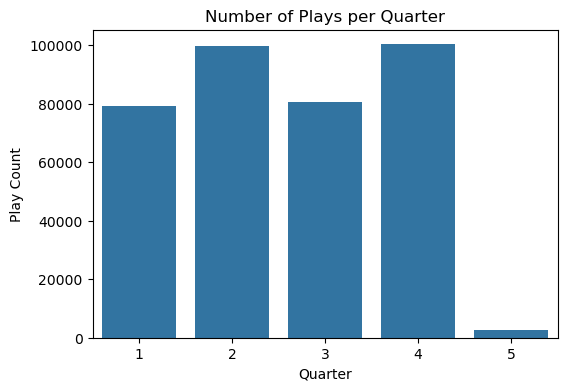

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='qtr', data=df)
plt.title("Number of Plays per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Play Count")
plt.show()


In [25]:
games = (df.groupby(['GameID', 'posteam','Date', 'Season'], as_index=False).sum())
games.head()

,GameID,posteam,Date,Season,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,2009091000,PIT,2009-09-10,2009,1270,245,167.0,15:0014:5314:1613:3513:2711:2410:4810:2109:430...,693,135177.0,2045.0,TENPITPITPITPITTENTENTENTENTENTENPITPITPITPITP...,2845.0,4653.0,676,1808,0.0,23.0,TENTENTENTENTENTENTENTENTENTENTENTENTENTENTENT...,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,88,476,4,1,Made,0,0,0,0,CleanCleanCleanCleanCleanCleanClean,KickoffPassRunPassPuntPassPassRunPassSackPuntR...,B.RoethlisbergerB.RoethlisbergerB.Roethlisberg...,00-002292400-002292400-002292400-002292400-002...,45,CompleteIncomplete PassCompleteCompleteComplet...,ShortDeepShortShortShortDeepShortShortShortDee...,402,115,7,leftrightrightleftrightrightleftrightleftleftr...,2,V.FullerC.Finnegan,W.ParkerW.ParkerR.MendenhallR.MendenhallW.Park...,00-002225000-002225000-002616300-002616300-002...,23,rightrightmiddlemiddlerightrightrightrightrigh...,endguardendendguardtackleguardguardtackleendta...,H.WardM.WallaceM.WallaceS.HolmesH.MillerH.Mill...,00-001716200-002690100-002690100-002424000-002...,34,Fair Catch,S.LoganC.FinneganC.FinneganS.LoganC.FinneganC....,0,M.GriffinC.HopeS.TullochW.HayesM.GriffinJ.Jone...,S.TullochK.VickersonJ.HayeC.FinneganJ.KearseS....,GoodGood,65.0,2,TEN,S.Tulloch,4,0,0,5,PITPITPITTENPIT,Illegal FormationEncroachmentDelay of Game,H.WardM.StarksM.WallaceK.Vanden BoschB.Roethli...,35,422.0,461.0,-39.0,51.0,PITPITPITPITPITPITPITPITPITPITPITPITPITPITPITP...,TENTENTENTENTENTENTENTENTENTENTENTENTENTENTENT...,0,0,234,234,245,234,245,13.649951,9.042120,0.216976,13.189850,23.725810,0.250976,26.924317,0.990795,0.0,141.251129,-4.716598,23.793724,-12.322201,48.309486,39.690514,47.664720,39.335280,48.309486,0.310761,-0.242881,0.948019
1,2009091000,TEN,2009-09-10,2009,986,189,148.0,13:1612:4012:1111:3408:2007:5707:2406:5706:520...,560,138463.0,1637.0,TENTENTENTENTENPITPITPITPITPITTENTENTENTENTENP...,2056.0,4416.0,651,1876,0.0,24.0,PITPITPITPITPITPITPITPITPITPITPITPITPITPITPITP...,(13:16) C.Johnson up the middle to TEN 2 for n...,77,425,3,1,Made,0,0,0,0,CleanCleanCleanCleanClean,RunPassRunPuntRunPassRunPassPassField GoalPass...,K.CollinsK.CollinsK.CollinsK.CollinsK.CollinsK...,00-000329200-000329200-000329200-000329200-000...,38,CompleteCompleteIncomplete PassIncomplete Pass...,ShortDeepShortShortShortDeepShortShortShortDee...,300,88,3,leftleftrightrightleftrightleftrightmiddleleft...,1,T.Polamalu,C.JohnsonC.JohnsonC.JohnsonC.JohnsonL.WhiteC.J...,00-002616400-002616400-002616400-002616400-002...,25,middleleftrightleftrightmiddleleftmiddleleftri...,endendendguardtackletackleguardguardguardguard...,A.HallB.ScaifeA.CrumplerB.ScaifeB.ScaifeJ.Gage...,00-002448900-002361200-002028500-002361200-002...,24,Fair CatchFair Catch,S.LoganS.LoganJ.RingerJ.RingerS.LoganJ.Ringer,0,B.KeiselT.PolamaluT.PolamaluM.GriffinT.Polamal...,J.FarriorC.HamptonA.SmithK.FoxC.HokeW.GayA.Har...,No

In [26]:
games_df = (df.groupby(['GameID', 'posteam'], as_index=False)
              .agg({
                  
                  'InterceptionThrown': 'sum',
                  'Fumble': 'sum',
                  'Touchdown': 'sum',
                  'FieldGoalResult': lambda x: (x == 'Good').sum(),
                  'Penalty.Yards': 'sum',
                  'Yards.Gained': 'mean',
                  'PuntResult': lambda x: (x == 'Blocked').sum(),
                  'Sack': 'sum',
                  'PosTeamScore': 'max',
                  'DefTeamScore': 'max',
                  'Season': 'first',
                  'FirstDown': 'sum',
                  'PassAttempt': 'sum',
                  'PassOutcome': lambda x: (x == 'Complete').sum(),
                  
                  
              }))
games_df.rename(columns={'PuntResult': 'PuntBlocked'}, inplace=True)
games_df['CompletionPercentage'] = games_df['PassOutcome'] / games_df['PassAttempt']
yards = (df.groupby(['GameID', 'posteam',], as_index=False)
              .agg({
                  'Yards.Gained': 'sum',
              }))
games_df['Yards.Gained'] = yards['Yards.Gained']
games_df['Win'] = (games_df['PosTeamScore'] > games_df['DefTeamScore']).astype(int)



season_games = games_df.groupby(['posteam', 'Season'], as_index=False).size()
season_games['total_wins'] = games_df.groupby(['posteam', 'Season'])['Win'].transform('sum')
season_games.head(20)

  

,posteam,Season,size,total_wins
0,ARI,2009,16,7
1,ARI,2010,16,7
2,ARI,2011,16,9
3,ARI,2012,16,6
4,ARI,2013,16,8
5,ARI,2014,16,3
6,ARI,2015,16,8
7,ARI,2016,16,10
8,ATL,2009,16,9
9,ATL,2010,16,7


In [27]:
games_df.head(10000).sort_values(by=['PuntBlocked'], ascending=False)

,GameID,posteam,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,PuntBlocked,Sack,PosTeamScore,DefTeamScore,Season,FirstDown,PassAttempt,PassOutcome,CompletionPercentage,Win
2928,2014113005,CAR,1,0,3,2,30,533,2,4,13.0,29.0,2014,27.0,37,20,0.540541,0
659,2010101011,SD,0,3,5,2,101,703,2,3,27.0,27.0,2010,31.0,48,28,0.583333,0
2048,2013090500,BAL,2,2,3,2,61,456,1,4,27.0,49.0,2013,32.0,64,34,0.531250,0
1586,2012091608,DAL,1,3,2,0,5,415,1,1,7.0,26.0,2012,21.0,40,23,0.575000,0
1695,2012101401,TB,1,2,5,1,50,521,1,1,43.0,3.0,2012,18.0,27,15,0.555556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2011112800,NYG,1,3,3,1,99,587,0,1,24.0,49.0,2011,32.0,51,33,0.647059,0
1376,2011120100,PHI,4,1,3,0,23,422,0,2,14.0,30.0,2011,24.0,29,17,0.586207,0
1377,2011120100,SEA,0,1,3,1,35,372,0,3,30.0,14.0,2011,18.0,17,13,0.764706,1
1378,2011120400,NYJ,0,1,4,2,70,368,0,0,34.0,19.0,2011,19.0,33,19,0.575758,1


In [28]:
games_df.head()
games = games_df[['GameID', 'posteam','Win', 'Season']]
games.head()

,GameID,posteam,Win,Season
0,2009091000,PIT,0,2009
1,2009091000,TEN,0,2009
2,2009091300,ATL,1,2009
3,2009091300,MIA,0,2009
4,2009091301,BAL,1,2009


In [29]:
def createMatchups(games):
    teamA = games.groupby("GameID").nth(0).reset_index()
    teamB = games.groupby("GameID").nth(1).reset_index()


    matchups = teamA.merge(
        teamB,
        on="GameID",
        suffixes=('_A', '_B')
    )
    return matchups
def create_hypothetical_matchup(teamA, teamB, season_df):
    A = season_df[season_df['Team'] == teamA].add_suffix('_A')
    B = season_df[season_df['Team'] == teamB].add_suffix('_B')

    # reset index for clean alignment
    A = A.reset_index(drop=True)
    B = B.reset_index(drop=True)

    # drop duplicate team and season name columns (optional)
    A = A.drop(columns=['Team_A', 'Season_A'], errors='ignore')
    B = B.drop(columns=['Team_B', 'Season_B'], errors='ignore')

    matchup = pd.concat([A, B], axis=1)
    return matchup

matchups = createMatchups(games)
matchups2009 = matchups[matchups['Season_A'] == 2009]
half_matchups = matchups[matchups['Season_A'] <= 2011]




In [30]:
games_averages = games_df.groupby(['posteam', 'Season'], as_index=False).mean()
games_averages = games_averages.drop(columns=['GameID'])
games_averages = games_averages.rename(columns={'Win': 'win'})
games_averages = games_averages.sort_values(by=['win'], ascending=False)
games_averages.head(10)

BestTeams = games_averages.head(10)
worstTeams = games_averages.tail(10)
games_averages2009 = games_averages[games_averages['Season'] == 2009]
bestTeama = BestTeams[['posteam', 'Season']].drop_duplicates()
bestTeama.head(10)
games_averages2009.head(10)

half_avg = games_averages.copy()[games_averages['Season'] <= 2011]
half_avg.head(10)

,posteam,Season,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,PuntBlocked,Sack,PosTeamScore,DefTeamScore,FirstDown,PassAttempt,PassOutcome,CompletionPercentage,win
90,GB,2011,0.6250,0.6875,3.8125,1.4375,49.7500,475.0000,0.0000,2.7500,32.1250,22.3750,22.7500,35.3125,23.1875,0.641801,0.8125
154,NO,2009,0.8125,1.5625,3.8750,1.3750,48.0000,523.9375,0.0000,1.3750,29.5625,21.1875,23.7500,35.3750,24.1250,0.681609,0.8125
147,NE,2010,0.3125,0.4375,3.6250,1.3750,44.3750,456.6250,0.0000,1.5625,31.1875,19.9375,22.3750,33.5625,21.5000,0.645250,0.8125
104,IND,2009,1.2500,0.7500,3.2500,1.0000,50.5000,466.0000,0.0000,0.8750,25.6875,19.0625,24.1875,39.2500,25.6250,0.653875,0.8125
220,SF,2011,0.3750,1.0000,2.1875,2.8750,57.0000,401.7500,0.0625,2.8750,23.2500,14.0000,21.6250,29.8125,18.0000,0.610676,0.8125
148,NE,2011,0.8125,0.8125,3.6875,1.7500,48.4375,513.9375,0.0000,2.1250,31.4375,21.0000,26.3750,40.0625,25.6875,0.639820,0.8125
18,BAL,2011,0.8125,1.3750,2.5000,1.8750,61.1250,443.7500,0.0000,2.1250,22.4375,16.0000,23.6250,36.0000,20.1875,0.563418,0.7500
196,PIT,2011,1.0000,1.1250,2.3750,1.4375,56.5625,464.7500,0.0625,2.8750,19.8125,13.7500,24.8125,35.1875,22.0000,0.623942,0.7500
156,NO,2011,0.8750,0.5625,4.1875,1.8750,43.7500,576.9375,0.0625,1.6875,34.2500,22.4375,27.3750,44.2500,31.4375,0.711328,0.7500
88,GB,2009,0.5000,1.4375,3.3125,1.6875,61.1875,499.8750,0.0625,3.3750,28.6250,18.0000,22.8750,36.6250,23.2500,0.635420,0.7500


In [31]:
BestTeams

,posteam,Season,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,PuntBlocked,Sack,PosTeamScore,DefTeamScore,FirstDown,PassAttempt,PassOutcome,CompletionPercentage,win
90,GB,2011,0.6250,0.6875,3.8125,1.4375,49.7500,475.0000,0.0000,2.7500,32.1250,22.3750,22.7500,35.3125,23.1875,0.641801,0.8125
153,NE,2016,0.1250,1.4375,3.2500,1.6875,56.8125,448.3750,0.0000,1.7500,27.1250,15.6250,23.9375,36.8750,23.8750,0.642576,0.8125
154,NO,2009,0.8125,1.5625,3.8750,1.3750,48.0000,523.9375,0.0000,1.3750,29.5625,21.1875,23.7500,35.3750,24.1250,0.681609,0.8125
147,NE,2010,0.3125,0.4375,3.6250,1.3750,44.3750,456.6250,0.0000,1.5625,31.1875,19.9375,22.3750,33.5625,21.5000,0.645250,0.8125
38,CAR,2015,0.6875,0.9375,3.5625,1.9375,51.2500,424.3750,0.0000,2.2500,30.3750,18.5625,24.7500,32.9375,19.0625,0.580476,0.8125
104,IND,2009,1.2500,0.7500,3.2500,1.0000,50.5000,466.0000,0.0000,0.8750,25.6875,19.0625,24.1875,39.2500,25.6250,0.653875,0.8125
220,SF,2011,0.3750,1.0000,2.1875,2.8750,57.0000,401.7500,0.0625,2.8750,23.2500,14.0000,21.6250,29.8125,18.0000,0.610676,0.8125
148,NE,2011,0.8125,0.8125,3.6875,1.7500,48.4375,513.9375,0.0000,2.1250,31.4375,21.0000,26.3750,40.0625,25.6875,0.639820,0.8125
75,DEN,2012,0.7500,1.1250,3.4375,1.6250,49.0625,460.1875,0.0000,1.3125,29.4375,17.9375,26.6875,38.8125,25.7500,0.670930,0.8125
15,ATL,2016,0.5000,0.5625,3.7500,2.1250,55.8125,474.1250,0.0000,2.5000,32.6875,24.9375,24.7500,35.4375,24.1875,0.682063,0.7500


In [32]:

import random

def create_matchups_with_averages(matchups, games_averages):
    # Merge Team A season averages
    matchups_a = matchups.copy()
    matchups_a = matchups_a.merge(
        games_averages,
        left_on="posteam_A",
        right_on="posteam",
        suffixes=("", "_A")
    ).drop(columns=["posteam", "Season"])


    # Merge Team B season averages
    matchups_a = matchups_a.merge(
        games_averages,
        left_on="posteam_B",
        right_on="posteam",
        suffixes=("", "_B")
    )
    return matchups_a

def create_one_matchup_per_team(alltime_df):
    df = alltime_df.copy().reset_index(drop=True)
    pairs = []
    
    teams = df.to_dict('records')  # list of dicts

    for teamA in teams:
        # randomly select a different team for B
        teamB = random.choice([t for t in teams if t['posteam'] != teamA['posteam']])
        
        pair = {
            "posteam_A": teamA["posteam"],
            "Season_A": teamA["Season"],
            "posteam_B": teamB["posteam"],
            "Season_B": teamB["Season"],
        }
        
        # add stats
        for col in df.columns:
            if col not in ["posteam", "Season"]:
                pair[f"{col}"] = teamA[col]
                pair[f"{col}_B"] = teamB[col]
        
        pairs.append(pair)
    
    return pd.DataFrame(pairs)


bestmatchup = create_one_matchup_per_team(BestTeams)

matchups2009a = create_matchups_with_averages(matchups2009, games_averages2009)
matchups2009a.head(20)
bestmatchup.head(2)
worstmatchup = create_one_matchup_per_team(worstTeams)
matchups = create_matchups_with_averages(matchups, games_averages)
matchups.head(5)
matchupsHalf = create_matchups_with_averages(half_matchups, half_avg)
matchupsHalf.tail(5)

,index_A,GameID,posteam_A,Win_A,Season_A,index_B,posteam_B,Win_B,Season_B,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,PuntBlocked,Sack,PosTeamScore,DefTeamScore,FirstDown,PassAttempt,PassOutcome,CompletionPercentage,win,posteam,Season,InterceptionThrown_B,Fumble_B,Touchdown_B,FieldGoalResult_B,Penalty.Yards_B,Yards.Gained_B,PuntBlocked_B,Sack_B,PosTeamScore_B,DefTeamScore_B,FirstDown_B,PassAttempt_B,PassOutcome_B,CompletionPercentage_B,win_B
6907,1534,2012010115,ARI,0,2011,1535,SEA,0,2011,1.5625,1.500,2.1875,1.1875,51.9375,450.8125,0.0,3.500,18.1875,21.4375,23.8125,36.2500,19.625,0.542989,0.2500,SEA,2010,1.4375,1.0000,2.0625,1.750,46.9375,415.0000,0.0,2.3125,18.9375,24.875,22.3125,35.2500,20.6875,0.586612,0.4375
6908,1534,2012010115,ARI,0,2011,1535,SEA,0,2011,1.5625,1.500,2.1875,1.1875,51.9375,450.8125,0.0,3.500,18.1875,21.4375,23.8125,36.2500,19.625,0.542989,0.2500,SEA,2009,1.2500,1.8750,1.8125,1.500,53.1250,440.2500,0.0,2.5625,16.3125,24.250,24.6250,39.5625,23.5000,0.588523,0.2500
6909,1534,2012010115,ARI,0,2011,1535,SEA,0,2011,1.3125,1.625,1.6875,1.5000,47.4375,436.2500,0.0,3.125,15.0000,27.0625,22.0625,36.1875,18.125,0.497253,0.1875,SEA,2011,0.8750,1.3125,2.1250,1.625,59.3125,414.3125,0.0,2.9375,19.7500,18.875,22.9375,33.5625,19.0625,0.575172,0.4375
6910,1534,2012010115,ARI,0,2011,1535,SEA,0,2011,1.3125,1.625,1.6875,1.5000,47.4375,436.2500,0.0,3.125,15.0000,27.0625,22.0625,36.1875,18.125,0.497253,0.1875,SEA,2010,1.4375,1.0000,2.0625,1.750,46.9375,415.0000,0.0,2.3125,18.9375,24.875,22.3125,35.2500,20.6875,0.586612,0.4375
6911,1534,2012010115,ARI,0,2011,1535,SEA,0,2011,1.3125,1.625,1.6875,1.5000,47.4375,436.2500,0.0,3.125,15.0000,27.0625,22.0625,36.1875,18.125,0.497253,0.1875,SEA,2009,1.2500,1.8750,1.8125,1.500,53.1250,440.2500,0.0,2.5625,16.3125,24.250,24.6250,39.5625,23.5000,0.588523,0.2500


In [33]:
bestmatchup

,posteam_A,Season_A,posteam_B,Season_B,InterceptionThrown,InterceptionThrown_B,Fumble,Fumble_B,Touchdown,Touchdown_B,FieldGoalResult,FieldGoalResult_B,Penalty.Yards,Penalty.Yards_B,Yards.Gained,Yards.Gained_B,PuntBlocked,PuntBlocked_B,Sack,Sack_B,PosTeamScore,PosTeamScore_B,DefTeamScore,DefTeamScore_B,FirstDown,FirstDown_B,PassAttempt,PassAttempt_B,PassOutcome,PassOutcome_B,CompletionPercentage,CompletionPercentage_B,win,win_B
0,GB,2011,NE,2010,0.6250,0.3125,0.6875,0.4375,3.8125,3.6250,1.4375,1.3750,49.7500,44.3750,475.0000,456.6250,0.0000,0.0000,2.7500,1.5625,32.1250,31.1875,22.3750,19.9375,22.7500,22.3750,35.3125,33.5625,23.1875,21.5000,0.641801,0.645250,0.8125,0.8125
1,NE,2016,GB,2011,0.1250,0.6250,1.4375,0.6875,3.2500,3.8125,1.6875,1.4375,56.8125,49.7500,448.3750,475.0000,0.0000,0.0000,1.7500,2.7500,27.1250,32.1250,15.6250,22.3750,23.9375,22.7500,36.8750,35.3125,23.8750,23.1875,0.642576,0.641801,0.8125,0.8125
2,NO,2009,ATL,2016,0.8125,0.5000,1.5625,0.5625,3.8750,3.7500,1.3750,2.1250,48.0000,55.8125,523.9375,474.1250,0.0000,0.0000,1.3750,2.5000,29.5625,32.6875,21.1875,24.9375,23.7500,24.7500,35.3750,35.4375,24.1250,24.1875,0.681609,0.682063,0.8125,0.7500
3,NE,2010,IND,2009,0.3125,1.2500,0.4375,0.7500,3.6250,3.2500,1.3750,1.0000,44.3750,50.5000,456.6250,466.0000,0.0000,0.0000,1.5625,0.8750,31.1875,25.6875,19.9375,19.0625,22.3750,24.1875,33.5625,39.2500,21.5000,25.6250,0.645250,0.653875,0.8125,0.8125
4,CAR,2015,DEN,2012,0.6875,0.7500,0.9375,1.1250,3.5625,3.4375,1.9375,1.6250,51.2500,49.0625,424.3750,460.1875,0.0000,0.0000,2.2500,1.3125,30.3750,29.4375,18.5625,17.9375,24.7500,26.6875,32.9375,38.8125,19.0625,25.7500,0.580476,0.670930,0.8125,0.8125
5,IND,2009,SF,2011,1.2500,0.3750,0.7500,1.0000,3.2500,2.1875,1.0000,2.8750,50.5000,57.0000,466.0000,401.7500,0.0000,0.0625,0.8750,2.8750,25.6875,23.2500,19.0625,14.0000,24.1875,21.6250,39.2500,29.8125,25.6250,18.0000,0.653875,0.610676,0.8125,0.8125
6,SF,2011,NE,2016,0.3750,0.1250,1.0000,1.4375,2.1875,3.2500,2.8750,1.6875,57.0000,56.8125,401.7500,448.3750,0.0625,0.0000,2.8750,1.7500,23.2500,27.1250,14.0000,15.6250,21.6250,23.9375,29.8125,36.8750,18.0000,23.8750,0.610676,0.642576,0.8125,0.8125
7,NE,2011,IND,2009,0.8125,1.2500,0.8125,0.7500,3.6875,3.2500,1.7500,1.0000,48.4375,50.5000,513.9375,466.0000,0.0000,0.0000,2.1250,0.8750,31.4375,25.6875,21.0000,19.0625,26.3750,24.1875,40.0625,39.2500,25.6875,25.6250,0.639820,0.653875,0.8125,0.8125
8,DEN,2012,NE,2016,0.7500,0.1250,1.1250,1.4375,3.4375,3.2500,1.6250,1.6875,49.0625,56.8125,460.1875,448.3750,0.0000,0.0000,1.3125,1.7500,29.4375,27.1250,17.9375,15.6250,26.6875,23.9375,38.8125,36.8750,25.7500,23.8750,0.670930,0.642576,0.8125,0.8125
9,ATL,2016,IND,2009,0.5000,1.2500,0.5625,0.7500,3.7500,3.2500,2.1250,1.0000,55.8125,50.5000,474.1250,466.0000,0.0000,0.0000,2.5000,0.8750,32.6875,25.6875,24.9375,19.0625,24.7500,24.1875,35.4375,39.2500,24.1875,25.6250,0.682063,0.653875,0.7500,0.8125


In [34]:
matchups2009a.head(2)

,index_A,GameID,posteam_A,Win_A,Season_A,index_B,posteam_B,Win_B,Season_B,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,PuntBlocked,Sack,PosTeamScore,DefTeamScore,FirstDown,PassAttempt,PassOutcome,CompletionPercentage,win,posteam,Season,InterceptionThrown_B,Fumble_B,Touchdown_B,FieldGoalResult_B,Penalty.Yards_B,Yards.Gained_B,PuntBlocked_B,Sack_B,PosTeamScore_B,DefTeamScore_B,FirstDown_B,PassAttempt_B,PassOutcome_B,CompletionPercentage_B,win_B
0,0,2009091000,PIT,0,2009,1,TEN,0,2009,1.125,1.3125,2.6250,1.6875,52.1875,502.3125,0.0000,3.4375,22.5625,19.3125,22.7500,35.4375,22.5625,0.635407,0.4375,TEN,2009,0.9375,1.3750,2.2500,1.6875,34.3125,467.9375,0.0,0.8750,21.1875,24.9375,20.9375,30.8125,17.3125,0.552990,0.4375
1,2,2009091300,ATL,1,2009,3,MIA,0,2009,1.125,1.5000,2.9375,1.1875,48.8125,454.5000,0.0625,1.8750,21.7500,19.9375,23.1875,37.2500,21.1875,0.578595,0.5625,MIA,2009,1.2500,1.5625,2.6875,1.5625,35.6250,468.1250,0.0,2.1875,21.5000,24.1875,24.6250,35.2500,21.1250,0.603508,0.3750


In [35]:
from xml.parsers.expat import model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
def training(matchups2009a):
        X = matchups2009a.drop(columns=['posteam','posteam_A', 'posteam_B', 'Season', 'Season_A', 'Season_B', 'index_A', 'index_B','Win_B','Win_A', 'posteam','GameID', 'Touchdown', 'Touchdown_B'])
        y = matchups2009a['Win_A']

       

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(y_train.value_counts())

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)

        # Train
        tree = DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=42)
        tree.fit(X_train_scaled, y_train)
        logreg = LogisticRegression(C=1, max_iter=10000)
        logreg.fit(X_train_scaled, y_train)

        svm = SVC(kernel='rbf', probability=True)
        svm.fit(X_train_scaled, y_train)
        mlp = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000)
        mlp.fit(X_train_scaled, y_train)


        # Predict
        y_pred_tree = tree.predict( X_test_scaled)
        y_pred_logreg = logreg.predict( X_test_scaled)
        y_pred_mlp = mlp.predict(X_test_scaled)
        y_pred_svm = svm.predict(X_test_scaled)

        t = 0
        for i in range(10):
                f = accuracy_score(y_test, y_pred_mlp)
                if f > t:
                        t = f
        cm = confusion_matrix(y_test, y_pred_mlp)
        # Evaluate
        print("Model Evaluation Results for {matchups2009a}" )
        print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
        print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_tree))

        print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))
        print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logreg))

        print("Best Accuracy (MLP Classifier) out of 10 attempts:", t)
        print("Confusion Matrix (MLP Classifier):\n", cm)

        print("Accuracy (SVM Classifier):", accuracy_score(y_test, y_pred_svm))
        print("Confusion Matrix (SVM Classifier):\n", confusion_matrix(y_test, y_pred_svm))

        

        return logreg, X, scaler, svm
training(matchups2009a)
   


Win_A
0    108
1     96
Name: count, dtype: int64
Model Evaluation Results for {matchups2009a}
Accuracy (Decision Tree): 0.5576923076923077
Confusion Matrix (Decision Tree):
 [[11  8]
 [15 18]]
Accuracy (Logistic Regression): 0.6346153846153846
Confusion Matrix (Logistic Regression):
 [[13  6]
 [13 20]]
Best Accuracy (MLP Classifier) out of 10 attempts: 0.6346153846153846
Confusion Matrix (MLP Classifier):
 [[12  7]
 [12 21]]
Accuracy (SVM Classifier): 0.6346153846153846
Confusion Matrix (SVM Classifier):
 [[13  6]
 [13 20]]


(LogisticRegression(C=1, max_iter=10000),
      InterceptionThrown  Fumble  FieldGoalResult  Penalty.Yards  Yards.Gained  \
 0                1.1250  1.3125           1.6875        52.1875      502.3125   
 1                1.1250  1.5000           1.1875        48.8125      454.5000   
 2                0.8125  1.2500           1.3750        52.5625      480.6875   
 3                1.3125  1.3125           1.3750        36.0625      444.7500   
 4                0.8125  1.6250           1.5000        61.0625      434.7500   
 ..                  ...     ...              ...            ...           ...   
 251              1.3125  1.8750           1.1250        56.5000      475.1875   
 252              0.8125  0.9375           1.8750        52.3750      452.8750   
 253              0.8125  1.2500           1.3750        52.5625      480.6875   
 254              0.6250  0.8125           2.0000        41.9375      472.2500   
 255              1.2500  1.8750           1.5000       

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def training(matchups2009a):

    # 1. Define features and target
    drop_cols = [
        'posteam','posteam_A','posteam_B','Season','Season_A','Season_B',
        'index_A','index_B','Win_B','Win_A','GameID','Touchdown','Touchdown_B'
    ]
    X = matchups2009a.drop(columns=drop_cols)
    y = matchups2009a['Win_A']
    train_cols = X.columns.tolist()   # keep column order

    # 2. Train/test split BEFORE scaling (correct!)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 3. Fit scaler on TRAIN only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # 4. Train models
    tree = DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=42)
    tree.fit(X_train_scaled, y_train)

    logreg = LogisticRegression(C=1, max_iter=10000)
    logreg.fit(X_train_scaled, y_train)

    svm = SVC(kernel='rbf', probability=True)
    svm.fit(X_train_scaled, y_train)

    mlp = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000)
    mlp.fit(X_train_scaled, y_train)

    # 5. Evaluate
    print("Decision Tree accuracy:", accuracy_score(y_test, tree.predict(X_test_scaled)))
    print("LogReg accuracy:", accuracy_score(y_test, logreg.predict(X_test_scaled)))
    print("SVM accuracy:", accuracy_score(y_test, svm.predict(X_test_scaled)))
    print("MLP accuracy:", accuracy_score(y_test, mlp.predict(X_test_scaled)))

    # 6. Choose best model (example selects logistic regression)
    best_model = svm

    # 7. Return everything needed for prediction
    return best_model, scaler, train_cols


In [37]:
print(matchups2009a["Win_A"].value_counts())


Win_A
1    129
0    127
Name: count, dtype: int64


In [38]:
def predict_future(matchups_future, m1, X):
    
    df_future = matchups_future.copy()
    
    model = df_future[X.columns].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(model)
    proba = m1.predict_proba(X_scaled)
    
    
    
    
    col_for_A = list(m1.classes_).index(1)
    df_future["proba_A_wins"] = proba[:, col_for_A]  
    df_future["winner"] = df_future["proba_A_wins"].apply(lambda x: "A" if x >= 0.5 else "B")
    df_future["predicted_winner_team"] = df_future.apply(
    lambda row: row["posteam_A"] if row["winner"] == "A" else row["posteam_B"],
    axis=1,
    )
    df_future = df_future[['posteam_A', 'Season_A', 'posteam_B', 'Season_B', 'proba_A_wins', 'winner', 'predicted_winner_team']]
    return df_future

    


In [72]:
def predict_future(matchups_future, model, scaler, train_cols):
    
    df_future = matchups_future.copy()

    # 1. Use same training columns & same order
    X_future = df_future[train_cols].copy()

    # 2. Use the TRAINED scaler (DO NOT re-fit)
    X_scaled = scaler.transform(X_future)

    # 3. Predict probabilities
    proba = model.predict_proba(X_scaled)

    # Model classes are [0, 1] where 1 = A wins
    col_for_A = list(model.classes_).index(1)
    df_future["proba_A_wins"] = proba[:, col_for_A]

    # 4. Winner prediction
    df_future["winner"] = df_future["proba_A_wins"].apply(
        lambda p: "A" if p >= 0.5 else "B"
    )

    df_future["predicted_winner_team"] = df_future.apply(
        lambda r: r["posteam_A"] if r["winner"] == "A" else r["posteam_B"],
        axis=1
    )

    # 5. Clean output
    return df_future[[
        'posteam_A', 'Season_A',
        'posteam_B', 'Season_B',
        'proba_A_wins', 'winner', 'predicted_winner_team'
    ]]


In [40]:
def predict_future_debug(matchups_future, model, scaler, train_cols):
    df_future = matchups_future.copy()

    # 1. Use same training columns & same order
    X_future = df_future[train_cols].copy()

    # Debug: show first 5 rows of features
    print("X_future (first 5 rows):")
    print(X_future.head())

    # 2. Use the TRAINED scaler (DO NOT re-fit)
    X_scaled = scaler.transform(X_future)

    # Debug: show first 5 rows of scaled features
    print("X_scaled (first 5 rows):")
    print(X_scaled[:5])

    # 3. Predict probabilities
    proba = model.predict_proba(X_scaled)

    # Debug: show first 10 probability rows
    print("predict_proba (first 10 rows):")
    print(proba[:10])

    # Model classes are [0, 1] where 1 = A wins
    col_for_A = list(model.classes_).index(1)
    df_future["proba_A_wins"] = proba[:, col_for_A]

    # Debug: show first 10 probabilities for team A
    print("proba_A_wins (first 10):")
    print(df_future["proba_A_wins"].head(10))

    # 4. Winner prediction
    df_future["winner"] = df_future["proba_A_wins"].apply(
        lambda p: "A" if p >= 0.5 else "B"
    )

    df_future["predicted_winner_team"] = df_future.apply(
        lambda r: r["posteam_A"] if r["winner"] == "A" else r["posteam_B"],
        axis=1
    )

    # 5. Clean output
    return df_future[[
        'posteam_A', 'Season_A',
        'posteam_B', 'Season_B',
        'proba_A_wins', 'winner', 'predicted_winner_team'
    ]]


In [ ]:
def predict_future2(matchups_future, m1, scaler, X):
    # Copy
    train_cols = X.columns.tolist() 
    df_future = matchups_future.copy()

    # Ensure correct columns and order
    model = df_future[train_cols].copy()

    # Scale using training scaler
    X_scaled = scaler.transform(model)  # DO NOT fit again

    # Predict probabilities
    proba = m1.predict_proba(X_scaled)
    col_for_A = list(m1.classes_).index(1)
    df_future["proba_A_wins"] = proba[:, col_for_A]

    # Determine winner
    df_future["winner"] = df_future["proba_A_wins"].apply(lambda x: "A" if x >= 0.5 else "B")
    df_future["predicted_winner_team"] = df_future.apply(
        lambda row: row["posteam_A"] if row["winner"] == "A" else row["posteam_B"],
        axis=1
    )

    return df_future


In [61]:
m1, scaler, cols = training(matchupsHalf)


Decision Tree accuracy: 0.6276211135213304
LogReg accuracy: 0.6348517715112075
SVM accuracy: 0.6630513376717281
MLP accuracy: 0.6290672451193059


In [56]:
print(m1.classes_)  # Example output: [0, 1]


[0 1]


In [62]:
print(m1.predict_proba(scaler.transform(matchupsHalf[cols]))[:10])


[[0.30157422 0.69842578]
 [0.3130279  0.6869721 ]
 [0.32708665 0.67291335]
 [0.40597991 0.59402009]
 [0.46347325 0.53652675]
 [0.31931632 0.68068368]
 [0.53567465 0.46432535]
 [0.5        0.5       ]
 [0.5555387  0.4444613 ]
 [0.39893604 0.60106396]]


In [77]:


preds = predict_future(worstmatchup, m1, scaler, cols)


In [76]:
preds

,posteam_A,Season_A,posteam_B,Season_B,proba_A_wins,winner,predicted_winner_team
0,GB,2011,NE,2010,0.401989,B,NE
1,NE,2016,GB,2011,0.285435,B,GB
2,NO,2009,ATL,2016,0.477677,B,ATL
3,NE,2010,IND,2009,0.333268,B,IND
4,CAR,2015,DEN,2012,0.259761,B,DEN
5,IND,2009,SF,2011,0.552030,A,IND
6,SF,2011,NE,2016,0.456055,B,NE
7,NE,2011,IND,2009,0.320777,B,IND
8,DEN,2012,NE,2016,0.412000,B,NE
9,ATL,2016,IND,2009,0.294278,B,IND


In [44]:
print("Mean of A features:")
print(bestmatchup[[c for c in cols if "_B" not in c]].mean())
print("\nMean of B features:")
print(bestmatchup[[c for c in cols if "_B" in c]].mean())


Mean of A features:
InterceptionThrown        0.625000
Fumble                    0.931250
FieldGoalResult           1.718750
Penalty.Yards            51.100000
Yards.Gained            464.431250
PuntBlocked               0.006250
Sack                      1.937500
PosTeamScore             29.287500
DefTeamScore             19.462500
FirstDown                24.118750
PassAttempt              35.743750
PassOutcome              23.100000
CompletionPercentage      0.644908
win                       0.806250
dtype: float64

Mean of B features:
InterceptionThrown_B        0.65625
Fumble_B                    0.89375
FieldGoalResult_B           1.58125
Penalty.Yards_B            52.11250
Yards.Gained_B            456.24375
PuntBlocked_B               0.00625
Sack_B                      1.71250
PosTeamScore_B             28.00000
DefTeamScore_B             18.76250
FirstDown_B                23.86250
PassAttempt_B              36.44375
PassOutcome_B              23.72500
CompletionPercentage_B

In [ ]:
debug = predict_future_debug(bestmatchup, m1, scaler, cols)


X_future (first 5 rows):
   InterceptionThrown  Fumble  FieldGoalResult  Penalty.Yards  Yards.Gained  \
0              0.6250  0.6875           1.4375        49.7500      475.0000   
1              0.1250  1.4375           1.6875        56.8125      448.3750   
2              0.8125  1.5625           1.3750        48.0000      523.9375   
3              0.3125  0.4375           1.3750        44.3750      456.6250   
4              0.6875  0.9375           1.9375        51.2500      424.3750   

   PuntBlocked    Sack  PosTeamScore  DefTeamScore  FirstDown  PassAttempt  \
0          0.0  2.7500       32.1250       22.3750    22.7500      35.3125   
1          0.0  1.7500       27.1250       15.6250    23.9375      36.8750   
2          0.0  1.3750       29.5625       21.1875    23.7500      35.3750   
3          0.0  1.5625       31.1875       19.9375    22.3750      33.5625   
4          0.0  2.2500       30.3750       18.5625    24.7500      32.9375   

   PassOutcome  CompletionPerce

In [36]:
f = predict_future(bestmatchup, svm, X)

t = predict_future2(bestmatchup, m1, scaler, X)
t



,posteam_A,Season_A,posteam_B,Season_B,InterceptionThrown,InterceptionThrown_B,Fumble,Fumble_B,Touchdown,Touchdown_B,FieldGoalResult,FieldGoalResult_B,Penalty.Yards,Penalty.Yards_B,Yards.Gained,Yards.Gained_B,PuntBlocked,PuntBlocked_B,Sack,Sack_B,PosTeamScore,PosTeamScore_B,DefTeamScore,DefTeamScore_B,FirstDown,FirstDown_B,PassAttempt,PassAttempt_B,PassOutcome,PassOutcome_B,CompletionPercentage,CompletionPercentage_B,win,win_B,proba_A_wins,winner,predicted_winner_team
0,GB,2011,NE,2016,0.6250,0.1250,0.6875,1.4375,3.8125,3.2500,1.4375,1.6875,49.7500,56.8125,475.0000,448.3750,0.0000,0.0000,2.7500,1.7500,32.1250,27.1250,22.3750,15.6250,22.7500,23.9375,35.3125,36.8750,23.1875,23.8750,0.641801,0.642576,0.8125,0.8125,0.394404,B,NE
1,NE,2016,NO,2009,0.1250,0.8125,1.4375,1.5625,3.2500,3.8750,1.6875,1.3750,56.8125,48.0000,448.3750,523.9375,0.0000,0.0000,1.7500,1.3750,27.1250,29.5625,15.6250,21.1875,23.9375,23.7500,36.8750,35.3750,23.8750,24.1250,0.642576,0.681609,0.8125,0.8125,0.319362,B,NO
2,NO,2009,NE,2010,0.8125,0.3125,1.5625,0.4375,3.8750,3.6250,1.3750,1.3750,48.0000,44.3750,523.9375,456.6250,0.0000,0.0000,1.3750,1.5625,29.5625,31.1875,21.1875,19.9375,23.7500,22.3750,35.3750,33.5625,24.1250,21.5000,0.681609,0.645250,0.8125,0.8125,0.220104,B,NE
3,NE,2010,CAR,2015,0.3125,0.6875,0.4375,0.9375,3.6250,3.5625,1.3750,1.9375,44.3750,51.2500,456.6250,424.3750,0.0000,0.0000,1.5625,2.2500,31.1875,30.3750,19.9375,18.5625,22.3750,24.7500,33.5625,32.9375,21.5000,19.0625,0.645250,0.580476,0.8125,0.8125,0.352932,B,CAR
4,CAR,2015,IND,2009,0.6875,1.2500,0.9375,0.7500,3.5625,3.2500,1.9375,1.0000,51.2500,50.5000,424.3750,466.0000,0.0000,0.0000,2.2500,0.8750,30.3750,25.6875,18.5625,19.0625,24.7500,24.1875,32.9375,39.2500,19.0625,25.6250,0.580476,0.653875,0.8125,0.8125,0.458913,B,IND
5,IND,2009,SF,2011,1.2500,0.3750,0.7500,1.0000,3.2500,2.1875,1.0000,2.8750,50.5000,57.0000,466.0000,401.7500,0.0000,0.0625,0.8750,2.8750,25.6875,23.2500,19.0625,14.0000,24.1875,21.6250,39.2500,29.8125,25.6250,18.0000,0.653875,0.610676,0.8125,0.8125,0.484514,B,SF
6,SF,2011,NE,2011,0.3750,0.8125,1.0000,0.8125,2.1875,3.6875,2.8750,1.7500,57.0000,48.4375,401.7500,513.9375,0.0625,0.0000,2.8750,2.1250,23.2500,31.4375,14.0000,21.0000,21.6250,26.3750,29.8125,40.0625,18.0000,25.6875,0.610676,0.639820,0.8125,0.8125,0.354101,B,NE
7,NE,2011,DEN,2012,0.8125,0.7500,0.8125,1.1250,3.6875,3.4375,1.7500,1.6250,48.4375,49.0625,513.9375,460.1875,0.0000,0.0000,2.1250,1.3125,31.4375,29.4375,21.0000,17.9375,26.3750,26.6875,40.0625,38.8125,25.6875,25.7500,0.639820,0.670930,0.8125,0.8125,0.379680,B,DEN
8,DEN,2012,ATL,2016,0.7500,0.5000,1.1250,0.5625,3.4375,3.7500,1.6250,2.1250,49.0625,55.8125,460.1875,474.1250,0.0000,0.0000,1.3125,2.5000,29.4375,32.6875,17.9375,24.9375,26.6875,24.7500,38.8125,35.4375,25.7500,24.1875,0.670930,0.682063,0.8125,0.7500,0.409666,B,ATL
9,ATL,2016,GB,2011,0.5000,0.6250,0.5625,0.6875,3.7500,3.8125,2.1250,1.4375,55.8125,49.7500,474.1250,475.0000,0.0000,0.0000,2.5000,2.7500,32.6875,32.1250,24.9375,22.3750,24.7500,22.7500,35.4375,35.3125,24.1875,23.1875,0.682063,0.641801,0.7500,0.8125,0.217782,B,GB


In [16]:
X = matchups2009a.drop(columns=['posteam','posteam_A', 'posteam_B', 'Season', 'Season_A', 'Season_B', 'index_A', 'index_B','Win_B','Win_A', 'posteam','GameID', 'Touchdown', 'Touchdown_B'])
t = bestmatchup.drop(columns=['posteam_A', 'posteam_B','Season_A', 'Season_B', 'Touchdown', 'Touchdown_B'])

print(X.columns)
print(t.columns)


Index(['InterceptionThrown', 'Fumble', 'FieldGoalResult', 'Penalty.Yards',
       'Yards.Gained', 'PuntBlocked', 'Sack', 'PosTeamScore', 'DefTeamScore',
       'FirstDown', 'PassAttempt', 'PassOutcome', 'CompletionPercentage',
       'win', 'InterceptionThrown_B', 'Fumble_B', 'FieldGoalResult_B',
       'Penalty.Yards_B', 'Yards.Gained_B', 'PuntBlocked_B', 'Sack_B',
       'PosTeamScore_B', 'DefTeamScore_B', 'FirstDown_B', 'PassAttempt_B',
       'PassOutcome_B', 'CompletionPercentage_B', 'win_B'],
      dtype='object')
Index(['InterceptionThrown', 'InterceptionThrown_B', 'Fumble', 'Fumble_B',
       'FieldGoalResult', 'FieldGoalResult_B', 'Penalty.Yards',
       'Penalty.Yards_B', 'Yards.Gained', 'Yards.Gained_B', 'PuntBlocked',
       'PuntBlocked_B', 'Sack', 'Sack_B', 'PosTeamScore', 'PosTeamScore_B',
       'DefTeamScore', 'DefTeamScore_B', 'FirstDown', 'FirstDown_B',
       'PassAttempt', 'PassAttempt_B', 'PassOutcome', 'PassOutcome_B',
       'CompletionPercentage', 'CompletionPe

In [26]:
logreg, X = training(matchups2009a)

Win_A
0    108
1     96
Name: count, dtype: int64
Model Evaluation Results for {matchups2009a}
Accuracy (Decision Tree): 0.5576923076923077
Confusion Matrix (Decision Tree):
 [[11  8]
 [15 18]]
Accuracy (Logistic Regression): 0.6346153846153846
Confusion Matrix (Logistic Regression):
 [[13  6]
 [13 20]]
Best Accuracy (MLP Classifier) out of 10 attempts: 0.6923076923076923
Confusion Matrix (MLP Classifier):
 [[13  6]
 [10 23]]
Accuracy (SVM Classifier): 0.6538461538461539
Confusion Matrix (SVM Classifier):
 [[14  5]
 [13 20]]


In [27]:

f = predict_future(bestmatchup, logreg, X)
f = f.sort_values(by='proba_A_wins', ascending=False)
f

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [166]:


y = matchups2009a['Win_A']
print(y.value_counts())
m1 = training(matchups2009a)
probas = m1.predict_proba(matchups2009a.drop(columns=['posteam','posteam_A', 'posteam_B', 'Season', 'Season_A', 'Season_B', 'index_A', 'index_B','Win_B','Win_A', 'posteam','GameID', 'Touchdown', 'Touchdown_B']))[:10]
print(probas)

Win_A
1    129
0    127
Name: count, dtype: int64
Win_A
0    108
1     96
Name: count, dtype: int64
Model Evaluation Results for {matchups2009a}
Accuracy (Decision Tree): 0.5576923076923077
Confusion Matrix (Decision Tree):
 [[11  8]
 [15 18]]
Accuracy (Logistic Regression): 0.6346153846153846
Confusion Matrix (Logistic Regression):
 [[13  6]
 [13 20]]
Best Accuracy (MLP Classifier) out of 10 attempts: 0.6730769230769231
Confusion Matrix (MLP Classifier):
 [[15  4]
 [13 20]]
Accuracy (SVM Classifier): 0.6538461538461539
Confusion Matrix (SVM Classifier):
 [[14  5]
 [13 20]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


c:\Users\ttank\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [111]:
X = matchups2009a.drop(columns=['posteam','posteam_A', 'posteam_B', 'Season', 'Season_A', 'Season_B', 'index_A', 'index_B','Win_B','Win_A', 'posteam','GameID', 'Touchdown', 'Touchdown_B'])

print(X.columns)
print(bestmatchup.columns)

Index(['InterceptionThrown', 'Fumble', 'FieldGoalResult', 'Penalty.Yards',
       'Yards.Gained', 'PuntBlocked', 'Sack', 'PosTeamScore', 'DefTeamScore',
       'FirstDown', 'PassAttempt', 'PassOutcome', 'CompletionPercentage',
       'win', 'InterceptionThrown_B', 'Fumble_B', 'FieldGoalResult_B',
       'Penalty.Yards_B', 'Yards.Gained_B', 'PuntBlocked_B', 'Sack_B',
       'PosTeamScore_B', 'DefTeamScore_B', 'FirstDown_B', 'PassAttempt_B',
       'PassOutcome_B', 'CompletionPercentage_B', 'win_B'],
      dtype='object')
Index(['InterceptionThrown', 'InterceptionThrown_B', 'Fumble', 'Fumble_B',
       'FieldGoalResult', 'FieldGoalResult_B', 'Penalty.Yards',
       'Penalty.Yards_B', 'Yards.Gained', 'Yards.Gained_B', 'PuntBlocked',
       'PuntBlocked_B', 'Sack', 'Sack_B', 'PosTeamScore', 'PosTeamScore_B',
       'DefTeamScore', 'DefTeamScore_B', 'FirstDown', 'FirstDown_B',
       'PassAttempt', 'PassAttempt_B', 'PassOutcome', 'PassOutcome_B',
       'CompletionPercentage', 'CompletionPe

Model Evaluation Results for {matchups2009a}
Accuracy (Decision Tree): 0.6153846153846154
Confusion Matrix (Decision Tree):
 [[14  5]
 [15 18]]
Accuracy (Logistic Regression): 0.6346153846153846
Confusion Matrix (Logistic Regression):
 [[13  6]
 [13 20]]
Best Accuracy (MLP Classifier) out of 10 attempts: 0.6346153846153846
Confusion Matrix (MLP Classifier):
 [[15  4]
 [15 18]]
Accuracy (SVM Classifier): 0.6538461538461539
Confusion Matrix (SVM Classifier):
 [[14  5]
 [13 20]]


c:\Users\ttank\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


KeyError: 'posteam_B'

In [42]:
for x in range(2,20):
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Model Depth {x} Accuracy: {acc:.3f}")

Model Depth 2 Accuracy: 0.500
Model Depth 3 Accuracy: 0.558
Model Depth 4 Accuracy: 0.538
Model Depth 5 Accuracy: 0.558
Model Depth 6 Accuracy: 0.577
Model Depth 7 Accuracy: 0.596
Model Depth 8 Accuracy: 0.654
Model Depth 9 Accuracy: 0.654
Model Depth 10 Accuracy: 0.635
Model Depth 11 Accuracy: 0.654
Model Depth 12 Accuracy: 0.635
Model Depth 13 Accuracy: 0.654
Model Depth 14 Accuracy: 0.635
Model Depth 15 Accuracy: 0.654
Model Depth 16 Accuracy: 0.654
Model Depth 17 Accuracy: 0.654
Model Depth 18 Accuracy: 0.654
Model Depth 19 Accuracy: 0.654


In [42]:
feature_importances = pd.Series(
    tree.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

feature_importances


PosTeamScore_B            0.286489
PosTeamScore              0.147326
CompletionPercentage_B    0.091975
win                       0.067485
Sack_B                    0.058903
Yards.Gained              0.056778
DefTeamScore              0.039052
FirstDown                 0.034520
Fumble_B                  0.032758
PuntBlocked_B             0.028549
Penalty.Yards_B           0.027826
PassAttempt_B             0.025907
Penalty.Yards             0.022259
PassAttempt               0.019033
Fumble                    0.015954
DefTeamScore_B            0.013515
Sack                      0.013481
CompletionPercentage      0.010259
FieldGoalResult           0.003965
InterceptionThrown        0.003965
FieldGoalResult_B         0.000000
PuntBlocked               0.000000
InterceptionThrown_B      0.000000
FirstDown_B               0.000000
PassOutcome               0.000000
PassOutcome_B             0.000000
Yards.Gained_B            0.000000
dtype: float64

In [152]:
m1 = training(matchups2009a)
probas = m1.predict_proba(matchups2009a.drop(columns=['posteam','posteam_A', 'posteam_B', 'Season', 'Season_A', 'Season_B', 'index_A', 'index_B','Win_B','Win_A', 'posteam','GameID', 'Touchdown', 'Touchdown_B']))
print(probas[:10])


Model Evaluation Results for {matchups2009a}
Accuracy (Decision Tree): 0.6153846153846154
Confusion Matrix (Decision Tree):
 [[14  5]
 [15 18]]
Accuracy (Logistic Regression): 0.6346153846153846
Confusion Matrix (Logistic Regression):
 [[13  6]
 [13 20]]
Best Accuracy (MLP Classifier) out of 10 attempts: 0.6923076923076923
Confusion Matrix (MLP Classifier):
 [[14  5]
 [11 22]]
Accuracy (SVM Classifier): 0.6538461538461539
Confusion Matrix (SVM Classifier):
 [[14  5]
 [13 20]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


c:\Users\ttank\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model Evaluation Results for {matchups2009a}
Accuracy (Decision Tree): 0.5961538461538461
Confusion Matrix (Decision Tree):
 [[14  5]
 [16 17]]
Accuracy (Logistic Regression): 0.6346153846153846
Confusion Matrix (Logistic Regression):
 [[13  6]
 [13 20]]
Best Accuracy (MLP Classifier) out of 10 attempts: 0.6730769230769231
Confusion Matrix (MLP Classifier):
 [[15  4]
 [13 20]]
Accuracy (SVM Classifier): 0.6538461538461539
Confusion Matrix (SVM Classifier):
 [[14  5]
 [13 20]]


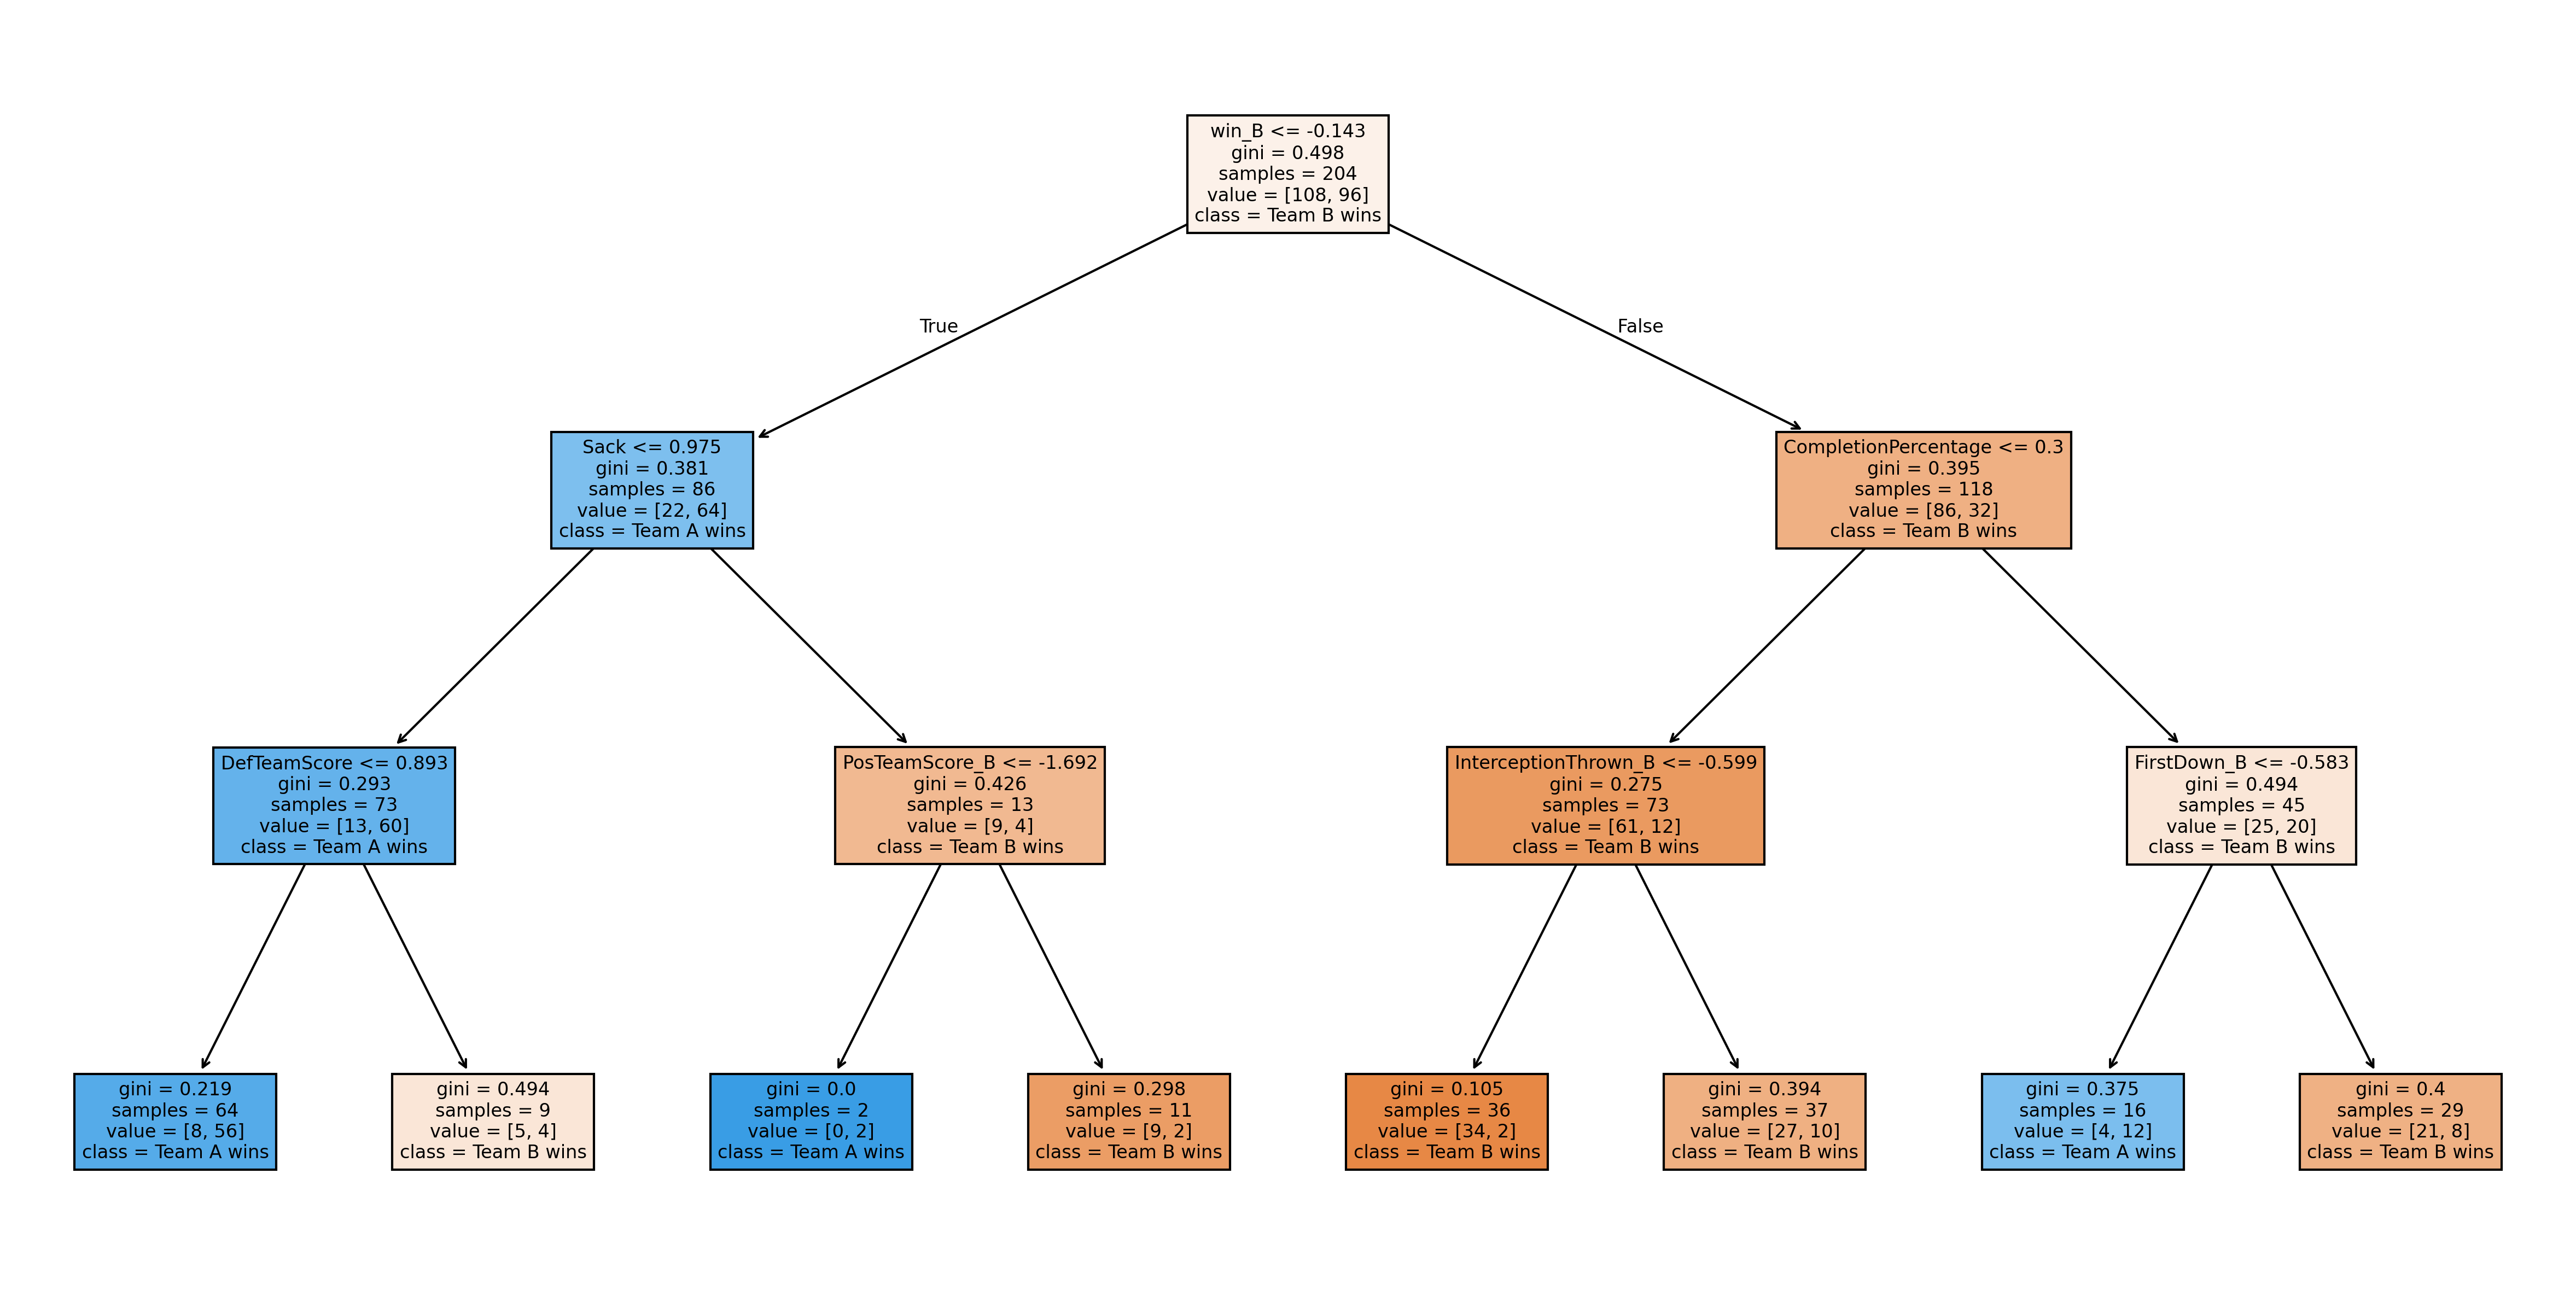

In [149]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = training(matchups2009a)
plt.figure(figsize=(20,10), dpi=300)
plot_tree(tree, feature_names=X.columns, class_names=['Team B wins', 'Team A wins'], filled=True)
plt.show()

Touchdown_B             0.245005
PosTeamScore            0.113330
DefTeamScore_B          0.107301
Yards.Gained_B          0.087564
Touchdown               0.086822
DefTeamScore            0.061456
Penalty.Yards           0.058996
Sack_B                  0.043313
Fumble_B                0.034646
InterceptionThrown      0.030606
Sack                    0.027162
FieldGoalResult         0.023880
Yards.Gained            0.023725
PosTeamScore_B          0.013651
Penalty.Yards_B         0.011962
FieldGoalResult_B       0.011298
InterceptionThrown_B    0.008715
Fumble                  0.006801
PuntBlocked             0.003766
PuntBlocked_B           0.000000
win                     0.000000
dtype: float64

In [24]:
matchups = matchups.merge(games_averages.add_suffix("_1"), left_on="posteam_A", right_on="posteam_B")
matchups = matchups.merge(games_averages.add_suffix("_2"), left_on="posteam_B", right_on="posteam_B")

KeyError: 'posteam_B'

In [17]:
matchups = games_averages.merge(
    games_averages,
    on='Season',
    suffixes=('_A', '_B')
)
matchups = matchups[matchups['posteam_A'] != matchups['posteam_B']]
matchups2012 = matchups[matchups['Season'] == 2012]
matchups2012.head(32)


,posteam_A,Season,InterceptionThrown_A,Fumble_A,Touchdown_A,FieldGoalResult_A,Penalty.Yards_A,Yards.Gained_A,ReturnResult_A,Sack_A,PosTeamScore_A,DefTeamScore_A,win_A,posteam_B,InterceptionThrown_B,Fumble_B,Touchdown_B,FieldGoalResult_B,Penalty.Yards_B,Yards.Gained_B,ReturnResult_B,Sack_B,PosTeamScore_B,DefTeamScore_B,win_B
1,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,TEN,1.0625,1.2500,2.1875,1.5625,48.1250,449.0000,0.5000,2.5625,19.2500,28.6875,0.2500
2,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,TB,1.1250,0.8125,2.7500,1.7500,47.1875,448.4375,0.1875,1.5625,23.6250,23.5625,0.5000
3,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,STL,0.8750,1.5000,1.9375,1.4375,53.6875,426.1875,0.1875,2.2500,17.6875,21.5625,0.3750
4,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,SF,0.5000,1.3750,2.8125,1.8750,51.1250,486.3750,0.1875,2.6250,24.8750,15.8125,0.7500
5,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,SEA,0.6875,1.0000,3.1250,1.5000,66.1250,424.0625,0.2500,2.3125,24.2500,15.7500,0.6250
6,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,SD,0.9375,1.3125,2.2500,1.6250,53.2500,395.1875,0.3125,3.0625,20.7500,21.4375,0.4375
7,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,PIT,0.8750,2.0000,2.6250,1.7500,53.1875,442.1875,0.3750,2.5625,19.9375,18.4375,0.3125
8,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,PHI,1.0000,2.3125,2.2500,1.6875,57.0000,478.8125,0.5000,3.0625,17.0000,26.1250,0.2500
9,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,OAK,1.0625,1.4375,1.9375,1.9375,60.1250,460.6875,0.1250,1.8125,17.4375,27.1875,0.1875
10,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,NYJ,1.2500,2.0625,2.1875,1.3125,38.7500,405.1875,0.4375,3.0625,17.4375,22.6875,0.3125


In [ ]:
df = matchups.copy()

# Drop ID and non-numeric fields
X = df.drop(columns=['posteam_A', 'posteam_B', 'win_A', 'win_B'])

y = df['win_A']  


In [ ]:
matchups['yards_diff'] = matchups['Yards.Gained_A'] - matchups['Yards.Gained_B']
matchups['PointsAVG_diff'] = matchups['Sack_A'] - matchups['Sack_B']
matchups['down_diff'] = matchups['down_A'] - matchups['down_B']
matchups['timeunder_diff'] = matchups['timeunder_A'] - matchups['timeunder_B']
matchups['points_diff'] = matchups['total_points_A'] - matchups['total_points_B']
matchups['win_diff'] = matchups['wins_A'] - matchups['wins_B']


C:\Users\ttank\AppData\Local\Temp\ipykernel_46528\932916650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sacks_win, x='Sack', y='win', palette='viridis')


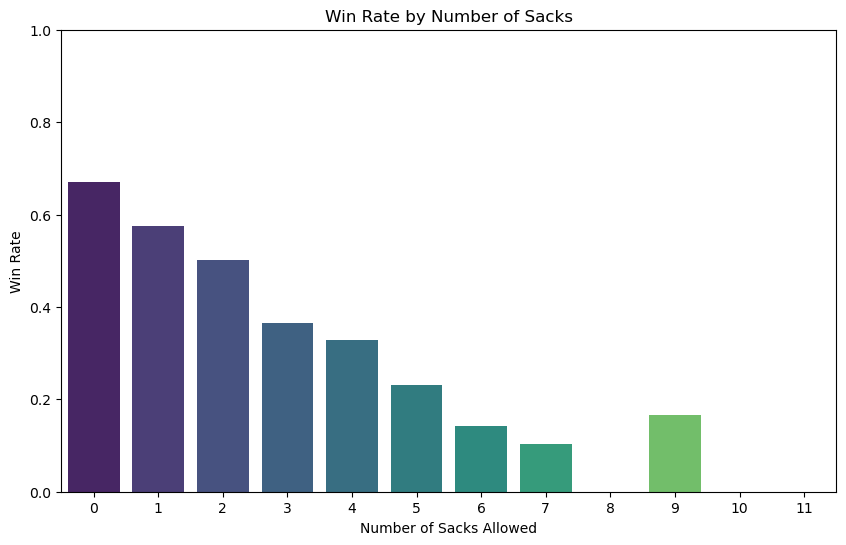

In [50]:
sacks_win = games_df.groupby('Sack', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sacks_win, x='Sack', y='win', palette='viridis')
plt.xlabel('Number of Sacks Allowed')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Sacks')
plt.ylim(0,1)
plt.show()

C:\Users\ttank\AppData\Local\Temp\ipykernel_46528\1449806415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sacks_win, x='Safety', y='win', palette='viridis')


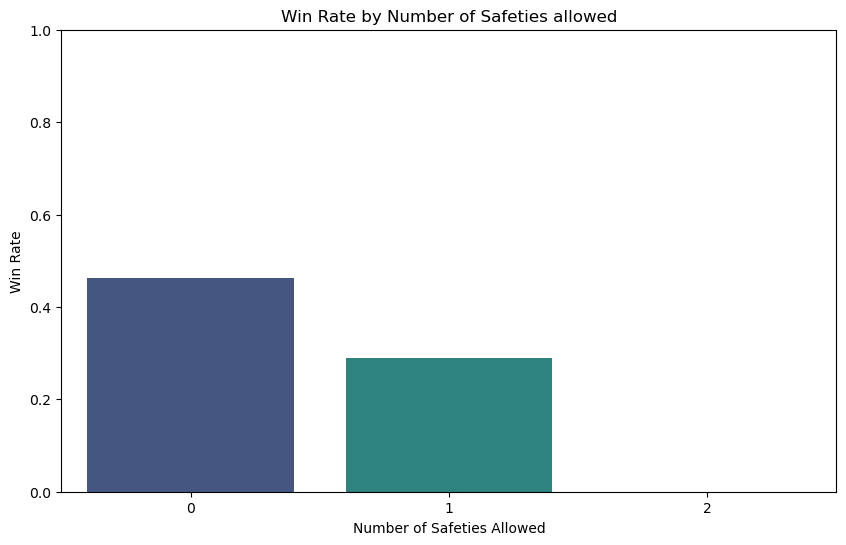

In [8]:
sacks_win = games_df.groupby('Safety', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sacks_win, x='Safety', y='win', palette='viridis')
plt.xlabel('Number of Safeties Allowed')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Safeties allowed')
plt.ylim(0,1)
plt.show()

C:\Users\ttank\AppData\Local\Temp\ipykernel_46528\3677807379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=touchdown_win, x='Touchdown', y='win', palette='viridis')


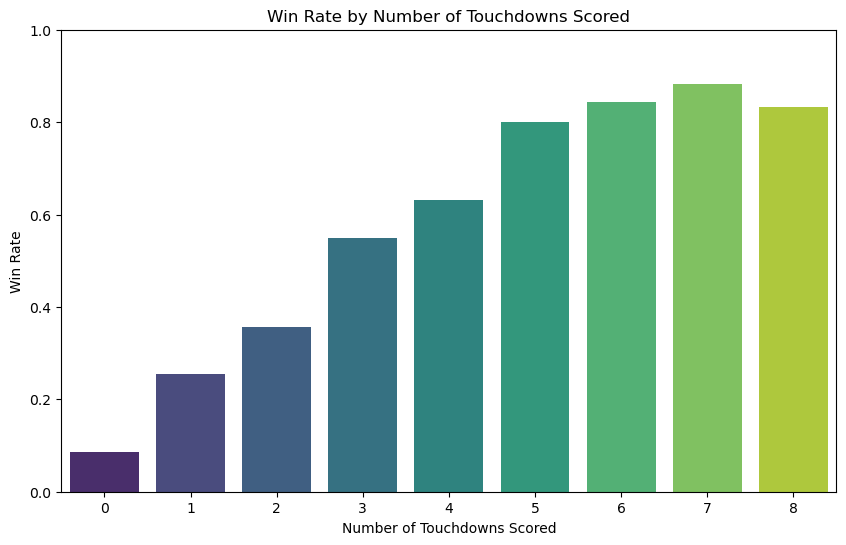

In [10]:
touchdown_win = games_df.groupby('Touchdown', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=touchdown_win, x='Touchdown', y='win', palette='viridis')
plt.xlabel('Number of Touchdowns Scored')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Touchdowns Scored')
plt.ylim(0,1)
plt.show()

In [8]:
games_df.to_csv("../data/nfl_cleaned.csv", index=False)
print("✅ Cleaned data saved to data/nfl_cleaned.csv")

✅ Cleaned data saved to data/nfl_cleaned.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load cleaned data
df = pd.read_csv("../data/nfl_cleaned.csv")

# Feature setup
df['target'] = (df['win'] > 0).astype(int)
df = pd.get_dummies(df, columns=['posteam'], drop_first=True)

X = df.drop(columns=['target', 'win', 'PosTeamScore', 'DefTeamScore', 'GameID'])
y = df['target']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

# Evaluate
acc = accuracy_score(y_test, model.predict(X_test))
print(f"Model Accuracy: {acc:.3f}")
acc = accuracy_score(y_test, model2.predict(X_test))
print(f"Model2 Accuracy: {acc:.3f}")



Model Accuracy: 0.717
Model2 Accuracy: 0.763


In [ ]:
for x in range(2,20):
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Model Depth {x} Accuracy: {acc:.3f}")


Model Depth 2 Accuracy: 0.690
Model Depth 3 Accuracy: 0.717
Model Depth 4 Accuracy: 0.748
Model Depth 5 Accuracy: 0.763
Model Depth 6 Accuracy: 0.765
Model Depth 7 Accuracy: 0.756
Model Depth 8 Accuracy: 0.750
Model Depth 9 Accuracy: 0.746
Model Depth 10 Accuracy: 0.748
Model Depth 11 Accuracy: 0.723
Model Depth 12 Accuracy: 0.728
Model Depth 13 Accuracy: 0.720
Model Depth 14 Accuracy: 0.728
Model Depth 15 Accuracy: 0.722
Model Depth 16 Accuracy: 0.717
Model Depth 17 Accuracy: 0.718
Model Depth 18 Accuracy: 0.722
Model Depth 19 Accuracy: 0.715


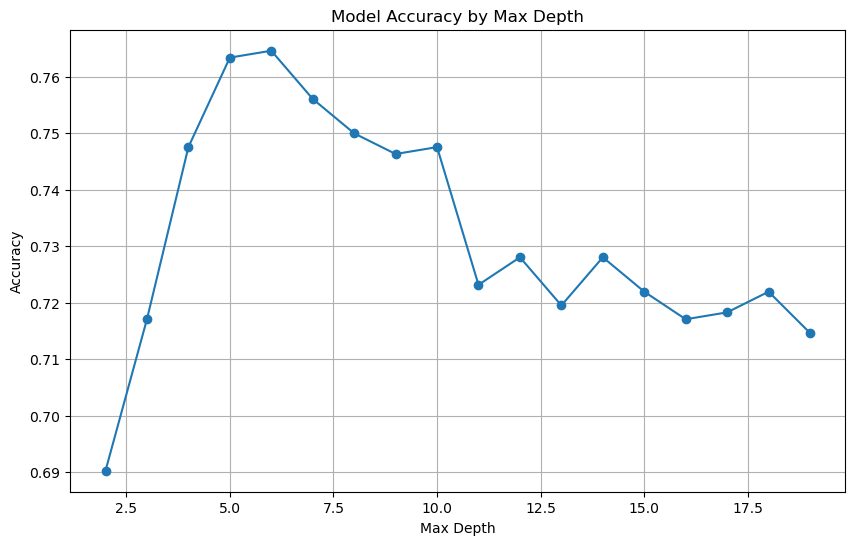

In [25]:
plt.figure(figsize=(10,6))
depths = list(range(2,20))
accuracies = []
for x in depths:
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Max Depth')
plt.grid(True)
plt.show()

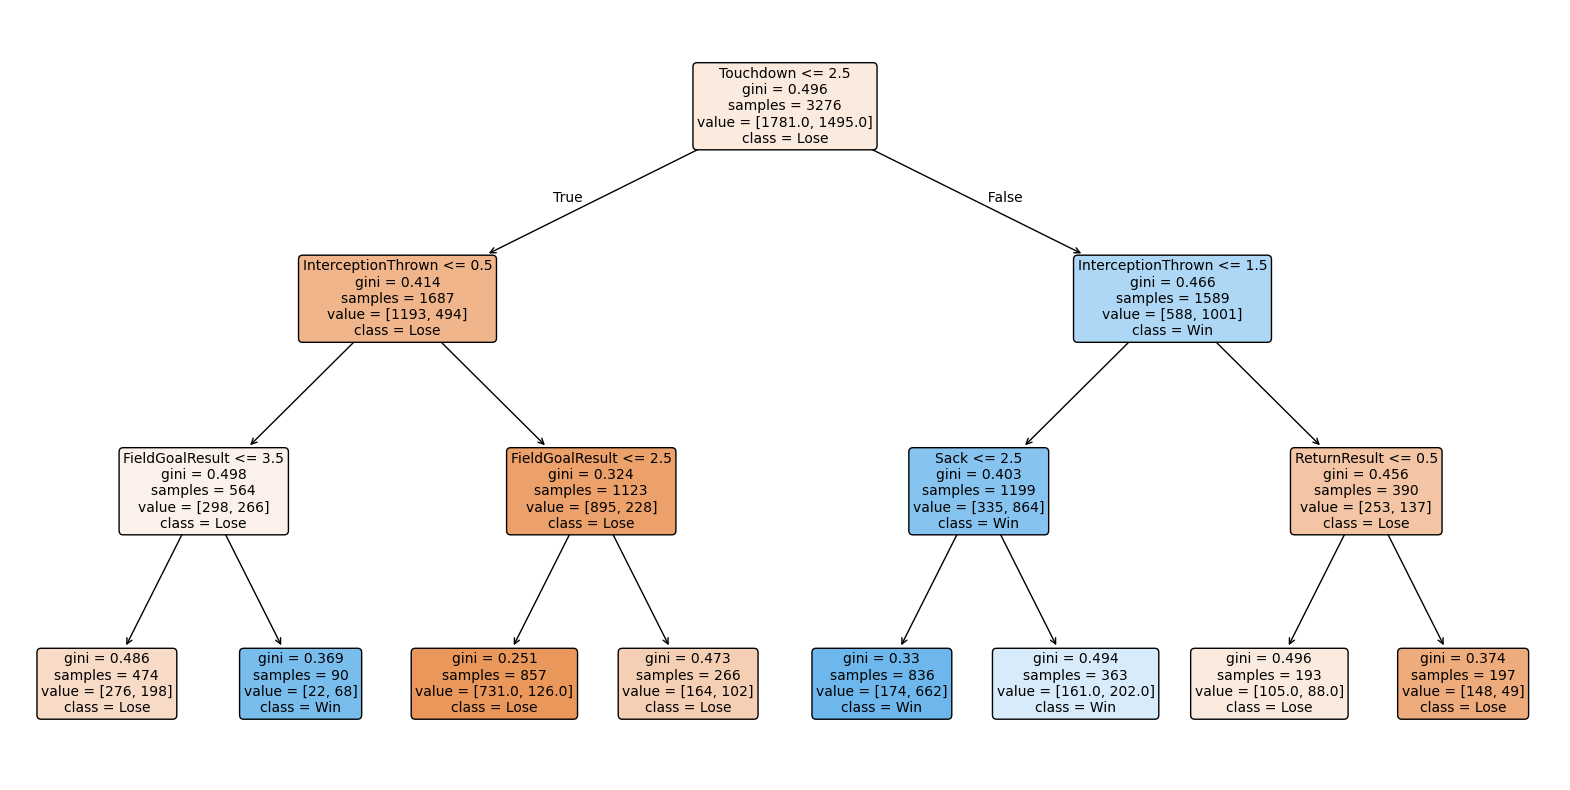

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Lose', 'Win'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()
